### Predict Diabetes from Medical Records::
#### Dataset (Pima Indians Database): (https://www.kaggle.com/uciml/pima-indians-diabetes-database)
 - Features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age
 - Outcome: Normal(0) vs Diabetes(1)

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import graphviz 
from sklearn import model_selection
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Loading Diabetic dataset

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(len(df))
print(df.shape)

768
(768, 9)


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee0e802ba8>,
      dtype=object)

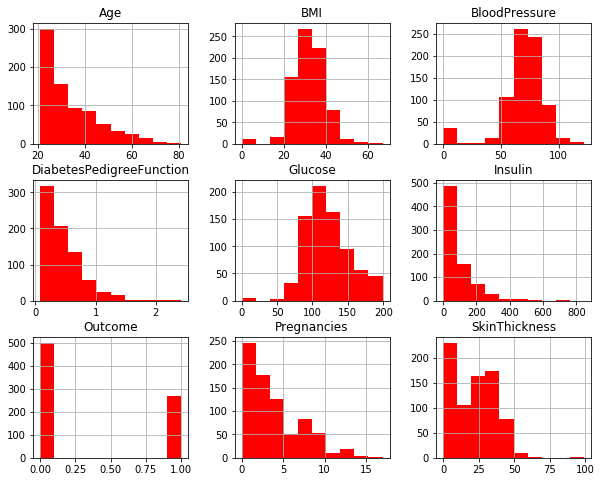

In [6]:
# df['Age'].hist(figsize=(10,8))
df.hist(layout=(3, 3), figsize=(10, 8), color="red")

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

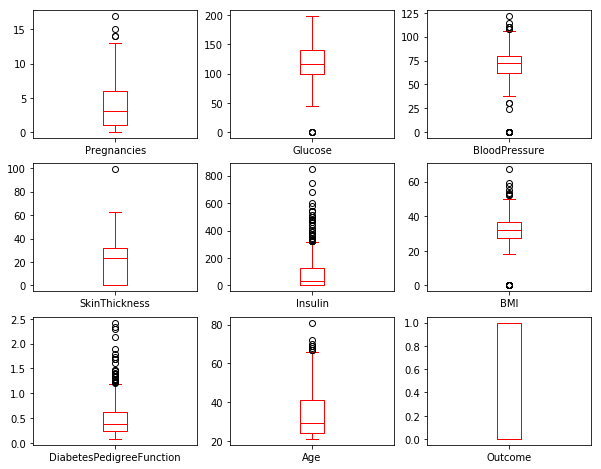

In [7]:
df.plot(kind= 'box' , subplots=True, layout=(3,3),sharex=False, sharey=False, figsize=(10,8), color='red')

In [8]:
column_x = df.columns[0:len(df.columns) - 1]
column_x

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### Checking Missing/Null Values for different Features

In [9]:
df1 = df.iloc[:, :-1]
print("\nColumn Name           % of Null Values\n")
# print((df1[:] == 0).sum())
((df1[:] == 0).sum())/768*100


Column Name           % of Null Values



Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

Note: Out of the 8 different features, Insulin and skinThickness have most missing values, 48.69% and 29.56% respectively. To understand better next I check the correlation plot (Outcome (healthy/diabetics) vs different features).
 - Because maybe the doctors only measured insulin and skinThickness for unhealthy looking patients. In that case Insulin and SkinThickness features are heavily correlated with a particular type of outcome (diabetic), and as a result the model based on this data is not generalized.

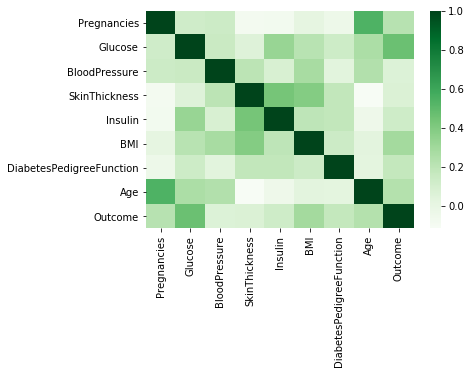

In [10]:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="Greens", annot = False) # cmap = "YlGnBu"/"Blues"/"BuPu"/"Greens"/"Reds"

#### From the correlation plot, it is clear that Insulin and SkinThickness are not correlated with the outcome.

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### Prepare Dataset for Training and Testing

In [12]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_trainold, X_testold, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
print("X_shape:",X.shape,"Y_shape:",y.shape)

X_shape: (768, 8) Y_shape: (768,)


In [14]:
print(X_trainold.shape, X_testold.shape)

(614, 8) (154, 8)


### In case of Training dataset, the missing values (0) are replaced by median

In [15]:
def plotHistogram(values,label,feature,title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)
    plotOne.map(sns.distplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()

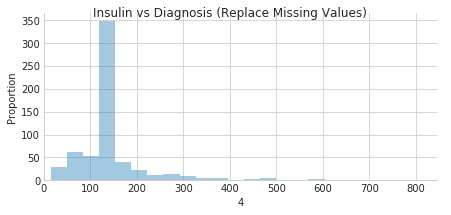

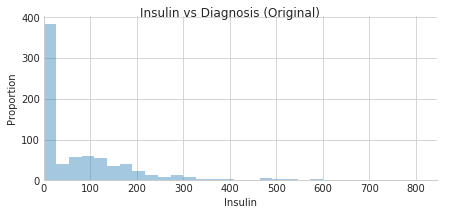

In [16]:
imputer = Imputer(missing_values=0,strategy='median')
X_train = imputer.fit_transform(X_trainold)
X_test = imputer.transform(X_testold)
X_trainnew = pd.DataFrame(X_train)
#print(X_trainnew)
# X_trainnew.hist()
plotHistogram(X_trainnew,None,4,'Insulin vs Diagnosis (Replace Missing Values)')
plotHistogram(df,None,'Insulin','Insulin vs Diagnosis (Original)')
# X_trainnew[4].hist(bins=20, color="red")

### Checking missing values after replacement with median

In [17]:
labels = {0:'Pregnancies',1:'Glucose',2:'BloodPressure',3:'SkinThickness',4:'Insulin',5:'BMI',6:'DiabetesPedigreeFunction',7:'Age'}
print((X_trainnew[:] == 0).sum())
print(labels)
#(df[:]==0).sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64
{0: 'Pregnancies', 1: 'Glucose', 2: 'BloodPressure', 3: 'SkinThickness', 4: 'Insulin', 5: 'BMI', 6: 'DiabetesPedigreeFunction', 7: 'Age'}


In [18]:
def Modelscomp(a, b, c, d):
    print('\nCompare Multiple Classifiers: \n')
    print('K-Fold Cross-Validation Accuracy: \n')
    names = []
    models = []
    resultsAccuracy = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('GBC', GradientBoostingClassifier()))
    for name, model in models:
        model.fit(a, b)
        kfold = model_selection.KFold(n_splits=10, random_state=7)
        accuracy_results = model_selection.cross_val_score(model, a,b, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage) 
    # Boxplot
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    box = plt.boxplot(resultsAccuracy, notch = False, patch_artist=True)
    colors = ['cyan', 'lightblue', 'lightgreen', 'tan', 'pink','yellow','orange','green']
    for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
    ax.set_xticklabels(names)
    ax.set_ylabel('Cross-Validation: Accuracy Score')
    plt.show()

In [19]:
def defineModels():
    print('\nLR = LogisticRegression')
    print('RF = RandomForestClassifier')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('LSVM = LinearSVC')
    print('GNB = GaussianNB')
    print('DTC = DecisionTreeClassifier')
    print('GBC = GradientBoostingClassifier \n\n')

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "MLPClassifier", "AdaBoost",
         "Naive Bayes", "QDA"]    

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]


Compare Multiple Classifiers: 

K-Fold Cross-Validation Accuracy: 

LR: 0.759016 (0.054501)
RF: 0.726362 (0.037887)
KNN: 0.711687 (0.072183)
SVM: 0.653146 (0.061181)
LSVM: 0.625410 (0.081772)
GNB: 0.741142 (0.056920)
DTC: 0.690375 (0.078359)
GBC: 0.757166 (0.073460)


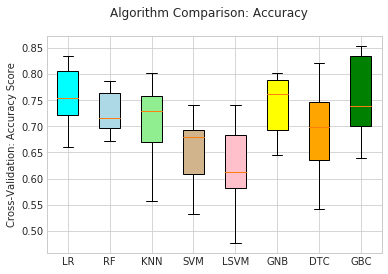

   Nearest Neighbors | Accuracy: 71.15% (+/- 8.23%)
          Linear SVM | Accuracy: 77.03% (+/- 2.90%)
             RBF SVM | Accuracy: 65.31% (+/- 0.48%)
    Gaussian Process | Accuracy: 67.07% (+/- 13.66%)
       Decision Tree | Accuracy: 68.72% (+/- 9.02%)
       Random Forest | Accuracy: 73.62% (+/- 3.31%)
       MLPClassifier | Accuracy: 70.04% (+/- 4.01%)
            AdaBoost | Accuracy: 73.30% (+/- 6.21%)
         Naive Bayes | Accuracy: 73.79% (+/- 5.07%)
                 QDA | Accuracy: 73.95% (+/- 3.87%)


In [20]:
Modelscomp(X_train, y_train, X_test, y_test)

results = {}
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    results[name] = scores
for name, scores in results.items():
    print("%20s | Accuracy: %0.2f%% (+/- %0.2f%%)" % 
          (name, 100*scores.mean(), 100*scores.std() * 2))

In [21]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
def runDecisionTree(a, b, c, d):
#    model = DecisionTreeClassifier()
    model = RandomForestClassifier()
    accuracy_scorer = make_scorer(accuracy_score)
    model.fit(a, b)
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(model, a, b, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    prediction = model.predict(c)
    cnf_matrix = confusion_matrix(d, prediction)
    #plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')
    plot_learning_curve(model, 'Learning Curve For Randomforest', a, b, (0.60,1.1), 10)
    #learning_curve(model, 'Learning Curve For DecisionTreeClassifier', a, b, (0.60,1.1), 10)
    plt.show()
    plot_confusion_matrix(cnf_matrix, classes=dict_characters,title='Confusion matrix')
    plt.show()
    print('Randomforest - Training set accuracy: %s (%s)' % (mean, stdev))
    return

### Explore Randomforest model in more Details:

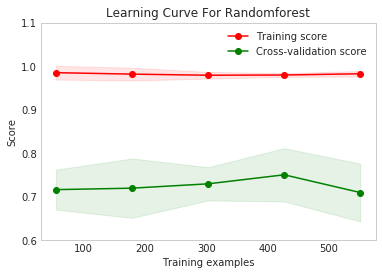

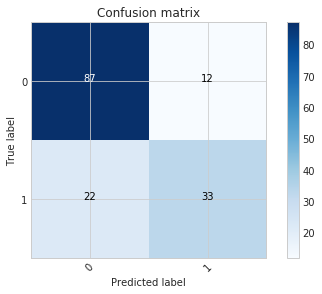

Randomforest - Training set accuracy: 0.7459809624537281 (0.048207317739576094)


In [24]:
dict_characters = {0: 'Healthy', 1: 'Diabetes'}
runDecisionTree(X_train, y_train, X_test, y_test)
feature_names1 = X.columns.values

In [25]:
def plot_decision_tree1(a,b):
    dot_data = tree.export_graphviz(a, out_file=None, 
                             feature_names=b,  
                             class_names=['Healthy','Diabetes'],  
                             filled=False, rounded=True,  
                             special_characters=False)  
    graph = graphviz.Source(dot_data)  
    return graph

### Explore Decision Tree

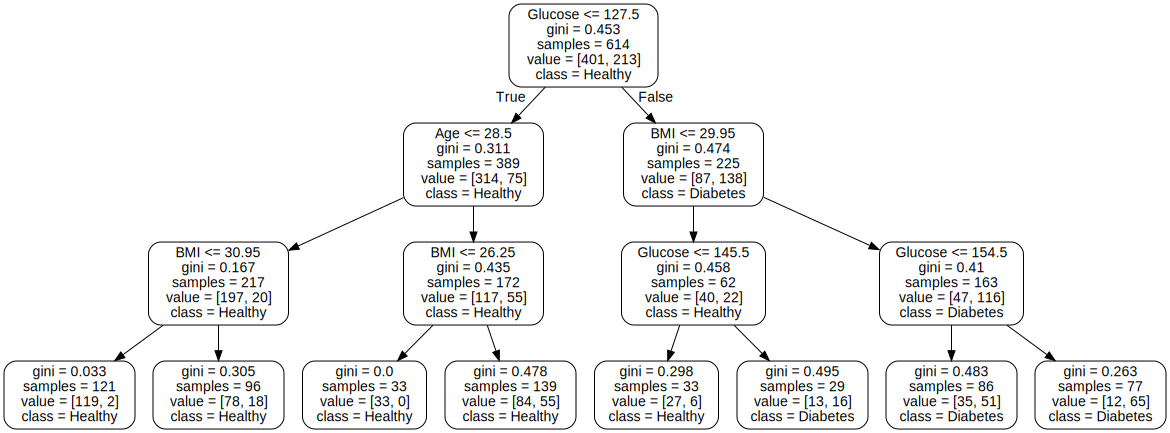

In [26]:
clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(X_train, y_train)
plot_decision_tree1(clf1,feature_names1)

### Evaluate the Importance of Features with Three models:
1. DecisionTree 2. RandomForest 3. 

In [27]:
X.columns.values

clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(X_train, y_train)
print('Accuracy of DecisionTreeClassifier: {:.2f}'.format(clf1.score(X_test, y_test)))
columns = X.columns
coefficients = clf1.feature_importances_.reshape(X.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('DecisionTreeClassifier - Feature Importance:')
print('\n',fullList,'\n')

feature_names = X.columns.values
clf2 = RandomForestClassifier(max_depth=3,min_samples_leaf=12)
clf2.fit(X_train, y_train)
print('Accuracy of RandomForestClassifier: {:.2f}'.format(clf2.score(X_test, y_test)))
columns = X.columns
coefficients = clf2.feature_importances_.reshape(X.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('RandomForestClassifier - Feature Importance:')
print('\n',fullList,'\n')

Accuracy of DecisionTreeClassifier: 0.78
DecisionTreeClassifier - Feature Importance:

                    Variable  absCoefficient
1                   Glucose        0.645256
5                       BMI        0.247421
7                       Age        0.107322
0               Pregnancies        0.000000
2             BloodPressure        0.000000
3             SkinThickness        0.000000
4                   Insulin        0.000000
6  DiabetesPedigreeFunction        0.000000 

Accuracy of RandomForestClassifier: 0.77
RandomForestClassifier - Feature Importance:

                    Variable  absCoefficient
1                   Glucose        0.286014
5                       BMI        0.193136
4                   Insulin        0.163411
6  DiabetesPedigreeFunction        0.132986
7                       Age        0.097021
0               Pregnancies        0.082512
3             SkinThickness        0.036884
2             BloodPressure        0.008037 



### Now build a decisionTree based classifier with two most important features (blood glucose levels and body mass index). 

In [28]:
data = df.drop(['Pregnancies','BloodPressure','DiabetesPedigreeFunction', 'Age',
                'SkinThickness','Insulin'], axis=1)
X1 = data.iloc[:, :-1]
y1 = data.iloc[:, -1]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X1, y1,test_size=0.2,
                                                                    random_state=1)
imputer = Imputer(missing_values=0,strategy='median')
X_train_new = imputer.fit_transform(X_train_new)
X_test_new = imputer.transform(X_test_new)
clf3 = tree.DecisionTreeClassifier()
clf3.fit(X_train_new, y_train_new)
print('Accuracy of TreeBasedClassifier in Reduced Feature Space: {:.2f}'.format
      (clf3.score(X_test_new, y_test_new)))
columns = X1.columns
coefficients = clf3.feature_importances_.reshape(X1.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('\nXGBClassifier - Feature Importance:')
print('\n',fullList,'\n')

Accuracy of TreeBasedClassifier in Reduced Feature Space: 0.68

XGBClassifier - Feature Importance:

   Variable  absCoefficient
0  Glucose        0.505235
1      BMI        0.494765 



Note: Accuracy with full features: 78%
      Accuracy with only two features (blood glucose levels and body mass index): 68%